## EDA using LLM and Langchain

### Pre-requisite Steps:
1. Sign up to Google AI studio and get the API key
    - Go to https://aistudio.google.com/app/apikey and sign in with an google account.
2. Install **Langchain** and **Google Generative AI** libraries
   - `pip install langchain-experimental`
   - `pip install langchain-google-genai`

### Dataset:
The dataset provided the information on over 4000 patients and included 15 attributes, each representing a potential risk factor for CHD (). These attributes included demographicm behaviour and medical risk factor.

https://www.kaggle.com/datasets/mamta1999/cardiovascular-risk-data

## Import Required Libraries

In [2]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv
from langchain_experimental.agents import create_pandas_dataframe_agent
from langchain_google_genai import GoogleGenerativeAI

In [5]:
load_dotenv()
google_api_key = os.getenv("GOOGLE_API_KEY")

## Read the Dataset

In [7]:
df  = pd.read_csv("data_cardiovascular_risk.csv")
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


## Configure the Langchain Agent

In [9]:
agent = create_pandas_dataframe_agent(llm= GoogleGenerativeAI(google_api_key= google_api_key,
                                                             model="gemini-pro",
                                                             temperature=0),
                                     df= df, verbose= True)

# Getting Metadata
####  Shape of dataset

In [10]:
result = agent("what is the shape of dataset")



> Entering new AgentExecutor chain...
Thought: I can just use the shape attribute
Action: python_repl_ast
Action Input: df.shape(3390, 17)Final Answer: (3390, 17)

> Finished chain.


In [11]:
result

{'input': 'what is the shape of dataset', 'output': '(3390, 17)'}

In [12]:
result["output"]

'(3390, 17)'

###  Validate with our dataframe

In [14]:
df.shape

(3390, 17)

### Get few data from dataset

In [15]:
result = agent("give 5 sample record")



> Entering new AgentExecutor chain...
Thought: I should just use `head()` method on dataframe
Action: python_repl_ast
Action Input: df.head()   id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0   F        YES         3.0     0.0                0   
1   1   36        4.0   M         NO         0.0     0.0                0   
2   2   46        1.0   F        YES        10.0     0.0                0   
3   3   50        1.0   M        YES        20.0     0.0                0   
4   4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   

Retrying langchain_google_genai.llms._completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised InternalServerError: 500 An internal error has occurred. Please retry or report in https://developers.generativeai.google/guide/troubleshooting.


Final Answer: ```python
df.head()
```

> Finished chain.


### Find missing Values in dataset

In [21]:
result = agent("give me the all missing values in the dataset")



> Entering new AgentExecutor chain...
Thought: I should just use .isnull() and then .any() to see the missing values
Action: python_repl_ast
Action Input: df.isnull().any()id                 False
age                False
education           True
sex                False
is_smoking         False
cigsPerDay          True
BPMeds              True
prevalentStroke    False
prevalentHyp       False
diabetes           False
totChol             True
sysBP              False
diaBP              False
BMI                 True
heartRate           True
glucose             True
TenYearCHD         False
dtype: boolFinal Answer: The missing values in the dataset are: education, cigsPerDay, BPMeds, totChol, BMI, heartRate, glucose

> Finished chain.


In [22]:
result

{'input': 'give me the all missing values in the dataset',
 'output': 'The missing values in the dataset are: education, cigsPerDay, BPMeds, totChol, BMI, heartRate, glucose'}

## Probability

### find frequency of variables

In [23]:
result = agent("what are the unique value in the education?")



> Entering new AgentExecutor chain...
Thought: we can use unique() to identify the unique elements
Action: python_repl_ast
Action Input: df['education'].unique()[ 2.  4.  1.  3. nan]Final Answer: [ 2.  4.  1.  3. nan]

> Finished chain.


In [24]:
result["output"]

'[ 2.  4.  1.  3. nan]'

In [29]:
df.education.unique()

array([ 2.,  4.,  1.,  3., nan])

In [37]:
prompt = """ Answer the question base on the following description.
in chd column 1 indicate person is suffering and 0 indicates the person is not suffering from chd.
than how many male are suffering ?
"""

In [38]:
result = agent(prompt)



> Entering new AgentExecutor chain...
Thought: The question concerns the number of male persons suffering from chd.
Action: python_repl_ast
Action Input: df[(df['sex']=='M')&(df['TenYearCHD']==1)].shape[0]272Final Answer: 272

> Finished chain.


In [43]:
pd.crosstab(df.TenYearCHD, df.sex)

sex,F,M
TenYearCHD,,
0,1684,1195
1,239,272


In [44]:
prompt = """ What is the probablity that a female will suffer from chd?
"""

In [46]:
result = agent(prompt)



> Entering new AgentExecutor chain...
Thought: The TenYearCHD column is a boolean value, so summing it up for a particular group will give me the number or females that will suffer from chd
Action: python_repl_ast
Action Input: sum(df[df['sex'] == 'F']['TenYearCHD'])239239 is the number of females that will suffer from chd. I need to find the total of females in the dataframe
Action: python_repl_ast
Action Input: len(df[df['sex'] == 'F'])1923I now know the final answer
Final Answer: 239 / 1923 * 100

> Finished chain.


In [48]:
result["output"]

'239 / 1923 * 100'

In [51]:
239 / 1923 * 100

12.428497139885595

In [52]:
pd.crosstab(df.TenYearCHD, df.sex, normalize="columns")*100

sex,F,M
TenYearCHD,,
0,87.571503,81.458759
1,12.428497,18.541241


## Univariate Analysis
1. Bar Plot

In [53]:
prompt = '''Draw a bar plot to depict number of persons suffering from chd?
'''



> Entering new AgentExecutor chain...
Thought: I should use the function `plot` with the proper arguments
Action: python_repl_ast
Action Input: df['TenYearCHD'].value_counts().plot(kind='bar')Axes(0.125,0.11;0.775x0.77)Final Answer: [Axes(0.125,0.11;0.775x0.77)]

> Finished chain.


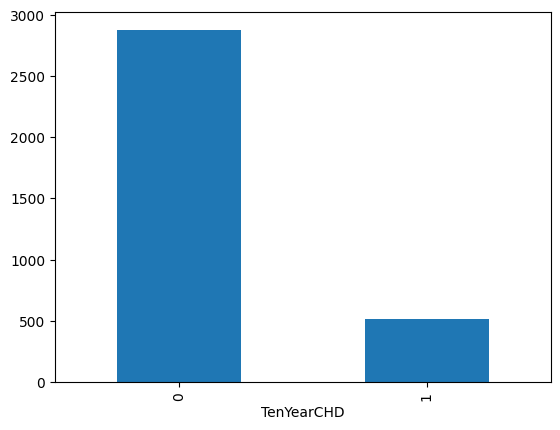

In [55]:
result = agent(prompt)

In [56]:
prompt = '''Draw a bar plot graph to depict number of persons having smoking history of chd stacked by chd'''



> Entering new AgentExecutor chain...


Retrying langchain_google_genai.llms._completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised InternalServerError: 500 An internal error has occurred. Please retry or report in https://developers.generativeai.google/guide/troubleshooting.


Thought: I should use `matplotlib.pyplot` to do this.
Action: python_repl_ast
Action Input: import matplotlib.pyplot as plt

Retrying langchain_google_genai.llms._completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised InternalServerError: 500 An internal error has occurred. Please retry or report in https://developers.generativeai.google/guide/troubleshooting.
Retrying langchain_google_genai.llms._completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised InternalServerError: 500 An internal error has occurred. Please retry or report in https://developers.generativeai.google/guide/troubleshooting.


Action: python_repl_ast
Action Input: df['is_smoking'].value_counts().plot(kind='bar', stacked=True, figsize=(10,6))Axes(0.125,0.11;0.775x0.77)Final Answer: See plot.

> Finished chain.


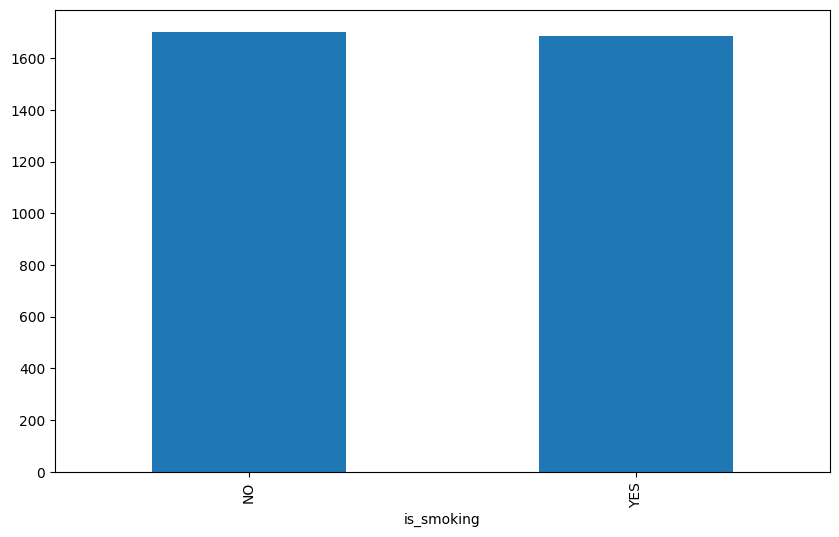

In [58]:
result = agent(prompt)

In [59]:
prompt = "plot a histogram graph of age columsn"



> Entering new AgentExecutor chain...
Thought: I can use the 'hist' function to create a histogram plot of the 'age' column
Action: python_repl_ast
Action Input: df['age'].hist()Axes(0.125,0.11;0.775x0.77)Thought: I can use the 'hist' function to create a histogram plot of the 'age' column
Action: python_repl_ast
Action Input: df['age'].hist()Axes(0.125,0.11;0.775x0.77)

Retrying langchain_google_genai.llms._completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised InternalServerError: 500 An internal error has occurred. Please retry or report in https://developers.generativeai.google/guide/troubleshooting.


I now know the final answer
Final Answer: None

> Finished chain.


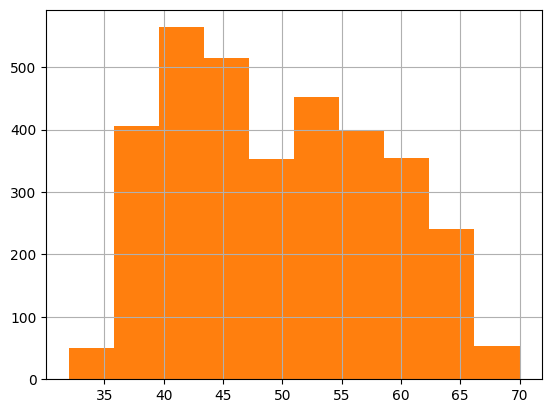

In [60]:
result = agent(prompt)

In [61]:
prompt = "are there any outliers in age columns?"

In [62]:
result = agent(prompt)



> Entering new AgentExecutor chain...
Thought: I should use describe() method to get the mean and stddev of age column
Action: python_repl_ast
Action Input: df.age.describe()count    3390.000000
mean       49.542183
std         8.592878
min        32.000000
25%        42.000000
50%        49.000000
75%        56.000000
max        70.000000
Name: age, dtype: float64Observation: I now know the final answer
Final Answer: no, there are no outliers

> Finished chain.


In [63]:
prompt = "are there any outliers in terms of age of those suffering from chd.\n find out using box."

In [69]:
prompt = """compare the probability distribution of tabacco consumption between those who suffer from chd and not 
suffer from chd using kde plot
"""

## Hypothesis test

In [72]:
prompt = """do t-test for the following hypothesis
Null hypothesis: Tabacco consumption o those who suffer from chd is same as those who don't suffer from chd
Alternate Hyphothesis: Tabacco consumption of those who suffer from chd is not same as those who don't suffer from chd"""



> Entering new AgentExecutor chain...
Thought: I should plot the probability distribution of the ages of those who suffer from chd and those who do not.
Action: python_repl_ast
Action Input: df.query('TenYearCHD == 1').age.plot.kde()Axes(0.125,0.11;0.775x0.77)I should plot the probability distribution of the ages of those who do not suffer from chd.
Action: python_repl_ast
Action Input: df.query('TenYearCHD == 0').age.plot.kde()Axes(0.125,0.11;0.775x0.77)I should add a legend to the plot.
Action: python_repl_ast
Action Input: plt.legend(['TenYearCHD == 1', 'TenYearCHD == 0'])LegendI need to add axis labels to complete the plot.
Action: python_repl_ast
Action Input: plt.xlabel('Age')Text(0.5, 0, 'Age')Action: python_repl_ast
Action Input: plt.ylabel('Density')Text(0, 0.5, 'Density')I now know the final answer
Final Answer: None

> Finished chain.


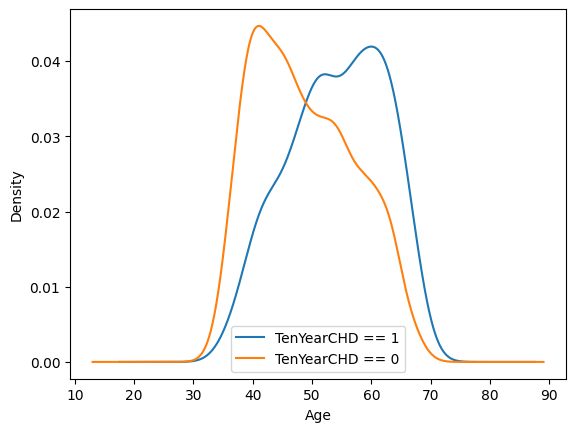

In [75]:
prompt = """Compare the probability distribution of age between 
those who suffer from chd and not suffer from chd using kde plot. 
Create a lenged, x and y labels for the plot."""
result = agent(prompt)

In [79]:
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')